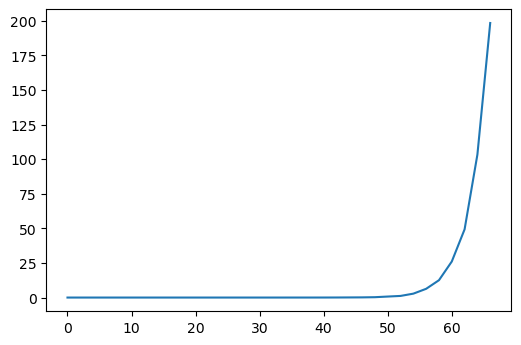

In [52]:
import numpy as np
import time
import matplotlib.pyplot as plt

def factorize(n):
   if (n % 2) == 0:
      return [2] + factorize(n//2)
     
   
   integer = 3
   while integer <= (n**0.5):     
      if n % integer == 0:      
         return [integer] + factorize(n // integer)
      else:
         integer += 2                        # Since all primes are odd.
   return [n]


def mathematical_attack(PU):
   factors = factorize(PU)
   return "NOT RSA" if len(factors) > 2  else factors


PUs = np.load('./n.npy', allow_pickle=True)


file_object = open('time.txt', 'a', buffering=1)
file_object2 = open('ns.txt', 'a', buffering=1)
if False:
   for PU in PUs:
      start = time.time()
      factorize(PU)
      end = time.time()
      file_object.write(f'{end-start} \n')
      file_object2.write(f'{PU} \n')



file_object.close()


times = []
with open('time.txt') as infile:
    lines = infile.readlines()
    for line in lines:
       times.append(float(line[:-2])/60)
times = np.array(times)

n_size = [2*i for i in range(len(PUs[0:34]))]
plt.figure(dpi=100)
plt.plot(n_size, times)
plt.savefig('plot.png', bbox_inches='tight', pad_inches=0)



